Antonnia Abdul
Data Science:Task 23
sutudent no: AN24020013912

## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [155]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [156]:
# Random state seed
rseed = 42

## Load and explore data

In [157]:
# Import the dataset
country_df = pd.read_csv("country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [158]:
# Check the shape
country_df.shape

(167, 10)

In [159]:
# Check datatypes & counts
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [160]:
# Get descriptive statistics
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [161]:
# Identify any missing data
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [162]:
# Drop any non-numeric features (columns)
country_df.drop('country', axis=1, inplace=True)
country_df.head(6)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


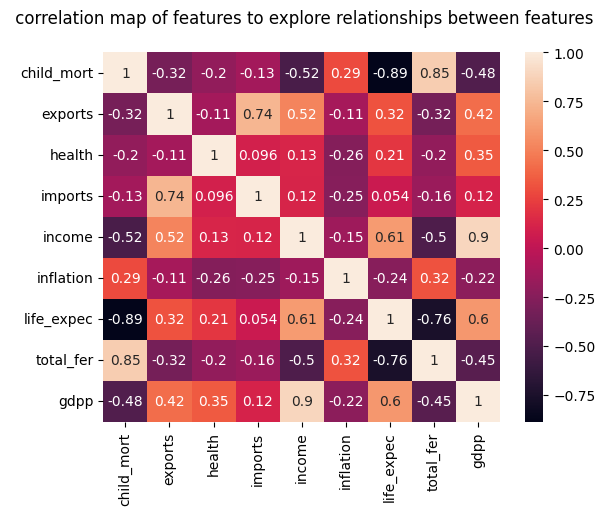

In [163]:
# Create a correlation map of features to explore relationships between features
  
# plotting the heatmap 
plt.figure()
country_correlation=country_df.corr()
sns.heatmap(data=country_correlation, 
                annot=True) 
plt.title(" correlation map of features to explore relationships between features\n")
plt.show()

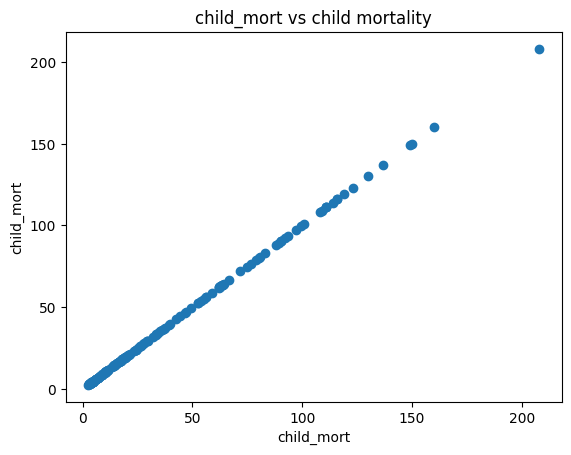

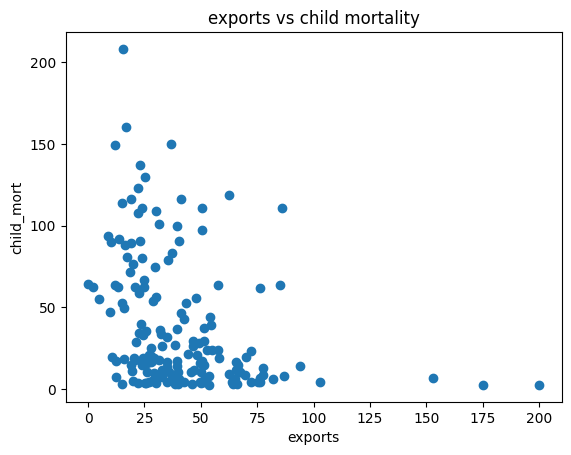

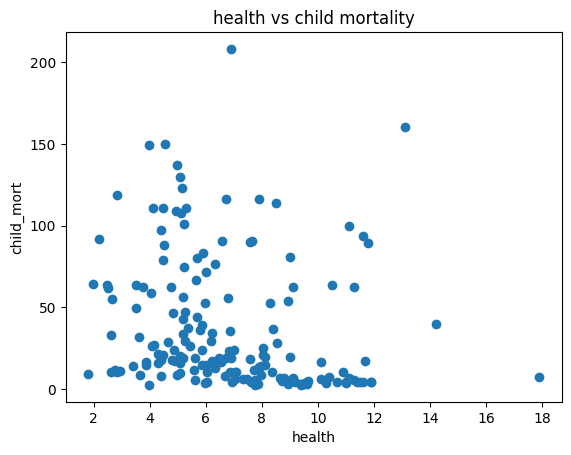

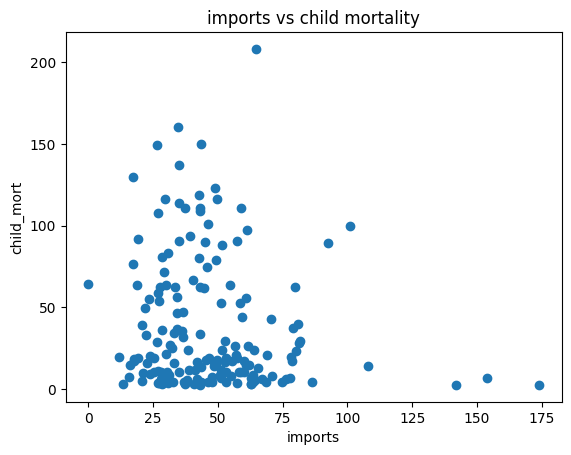

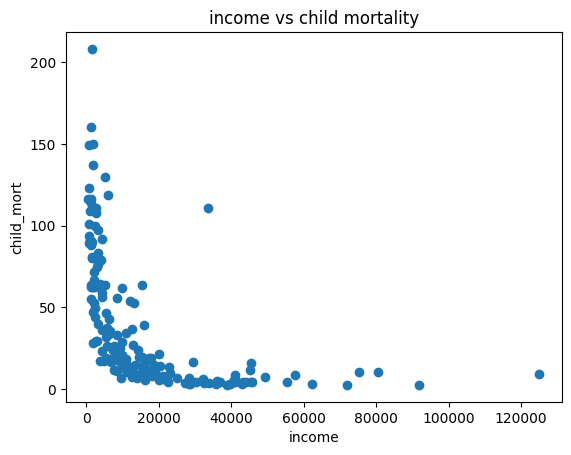

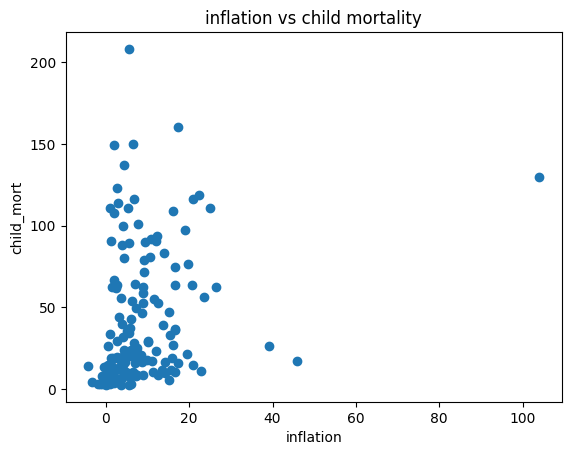

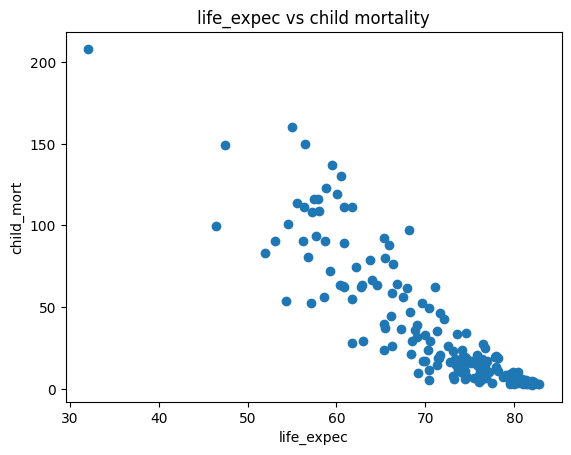

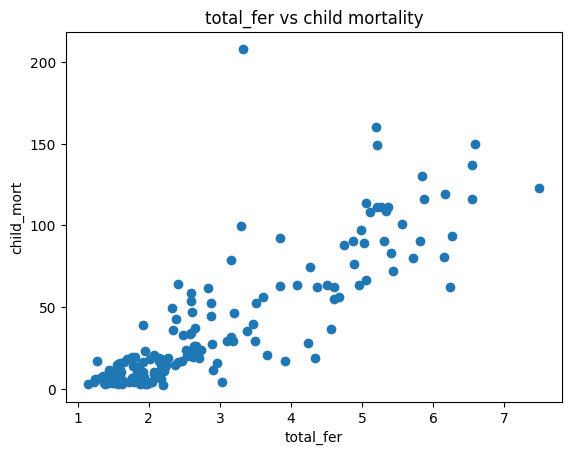

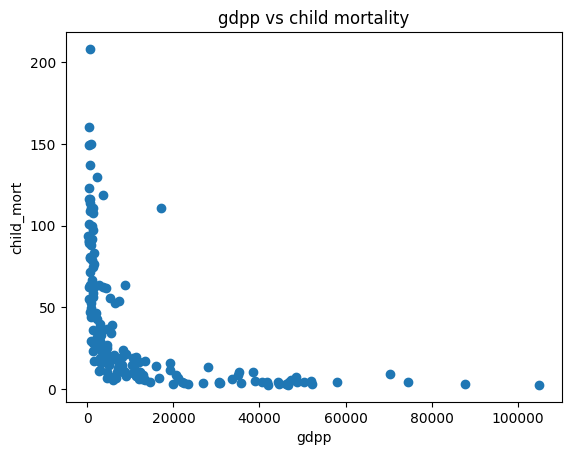

In [164]:
# Explore the continuous independent features against child_mort using scatter plots.

for f in country_df.columns[0:]:
  plt.scatter(country_df[f], country_df['child_mort'])
  plt.xlabel(f)
  plt.title(f"{f } vs child mortality")
  plt.ylabel('child_mort')
  plt.show()

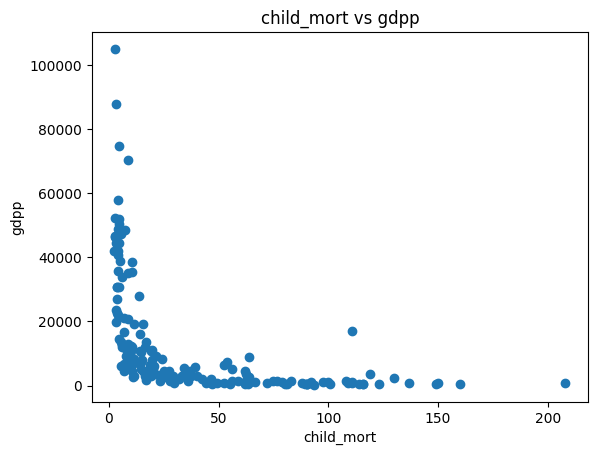

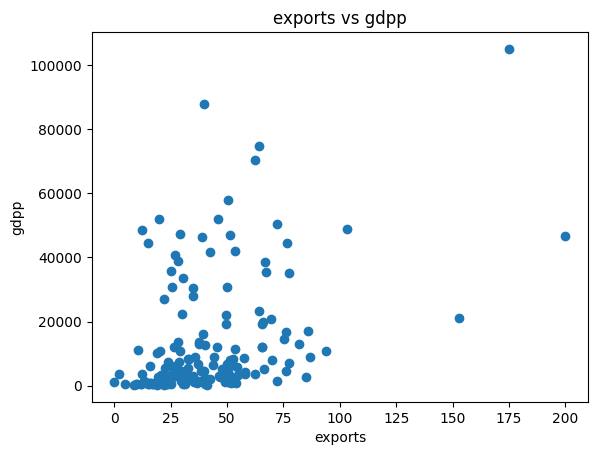

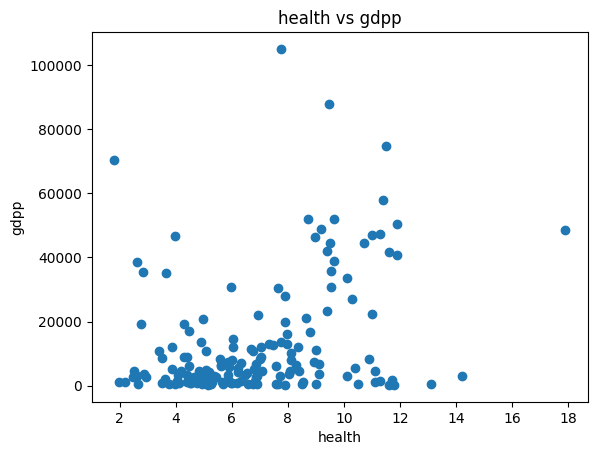

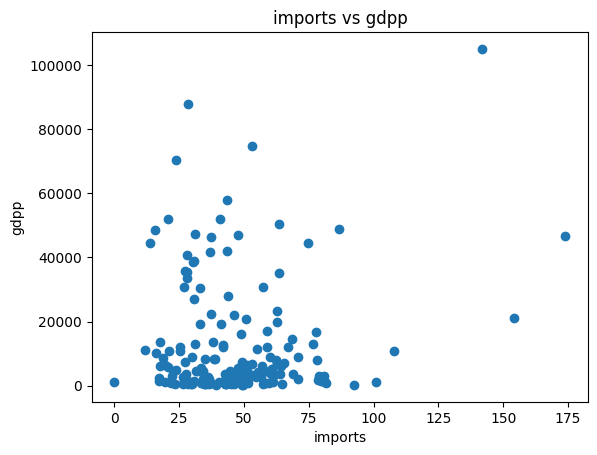

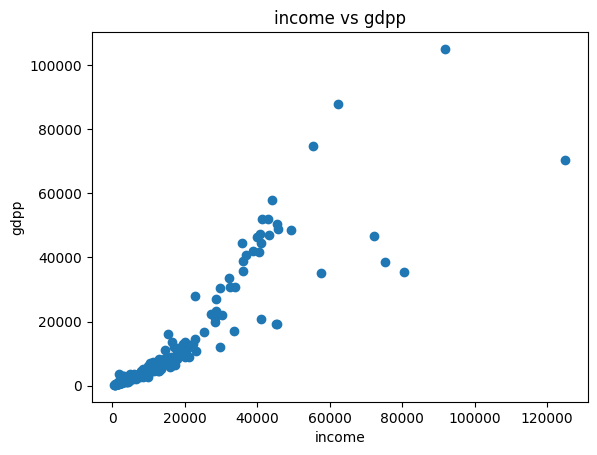

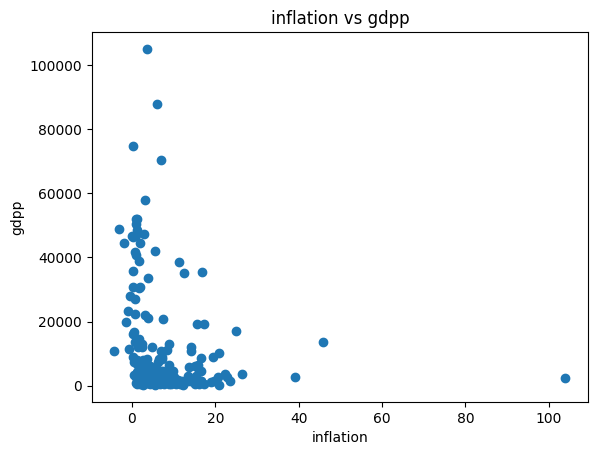

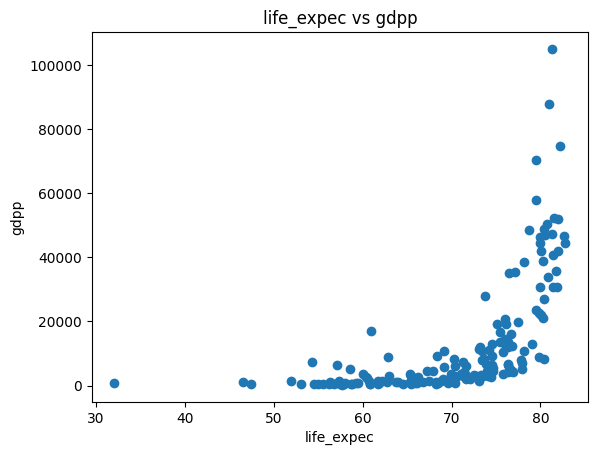

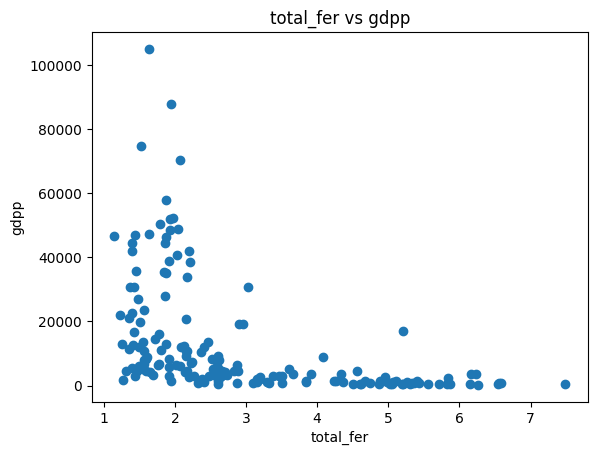

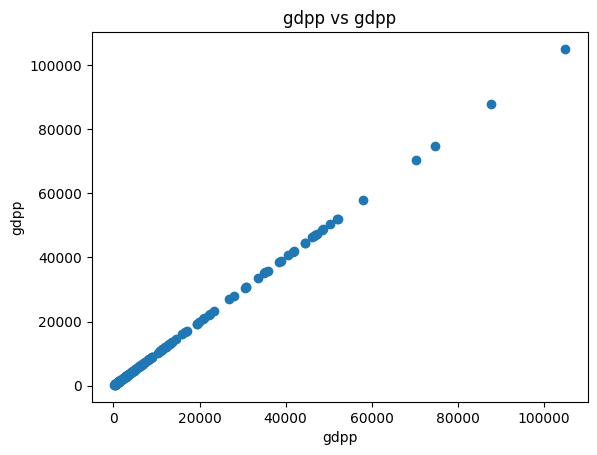

In [165]:
# Explore the continuous independent features against gdpp using scatter plots.

for f in country_df.columns[0:]:
  plt.scatter(country_df[f], country_df['gdpp'])
  plt.xlabel(f)
  plt.title(f"{f } vs gdpp")
  plt.ylabel('gdpp')
  plt.show()

Text(0.5, 1.0, 'scatter plots with different combinations of variables')

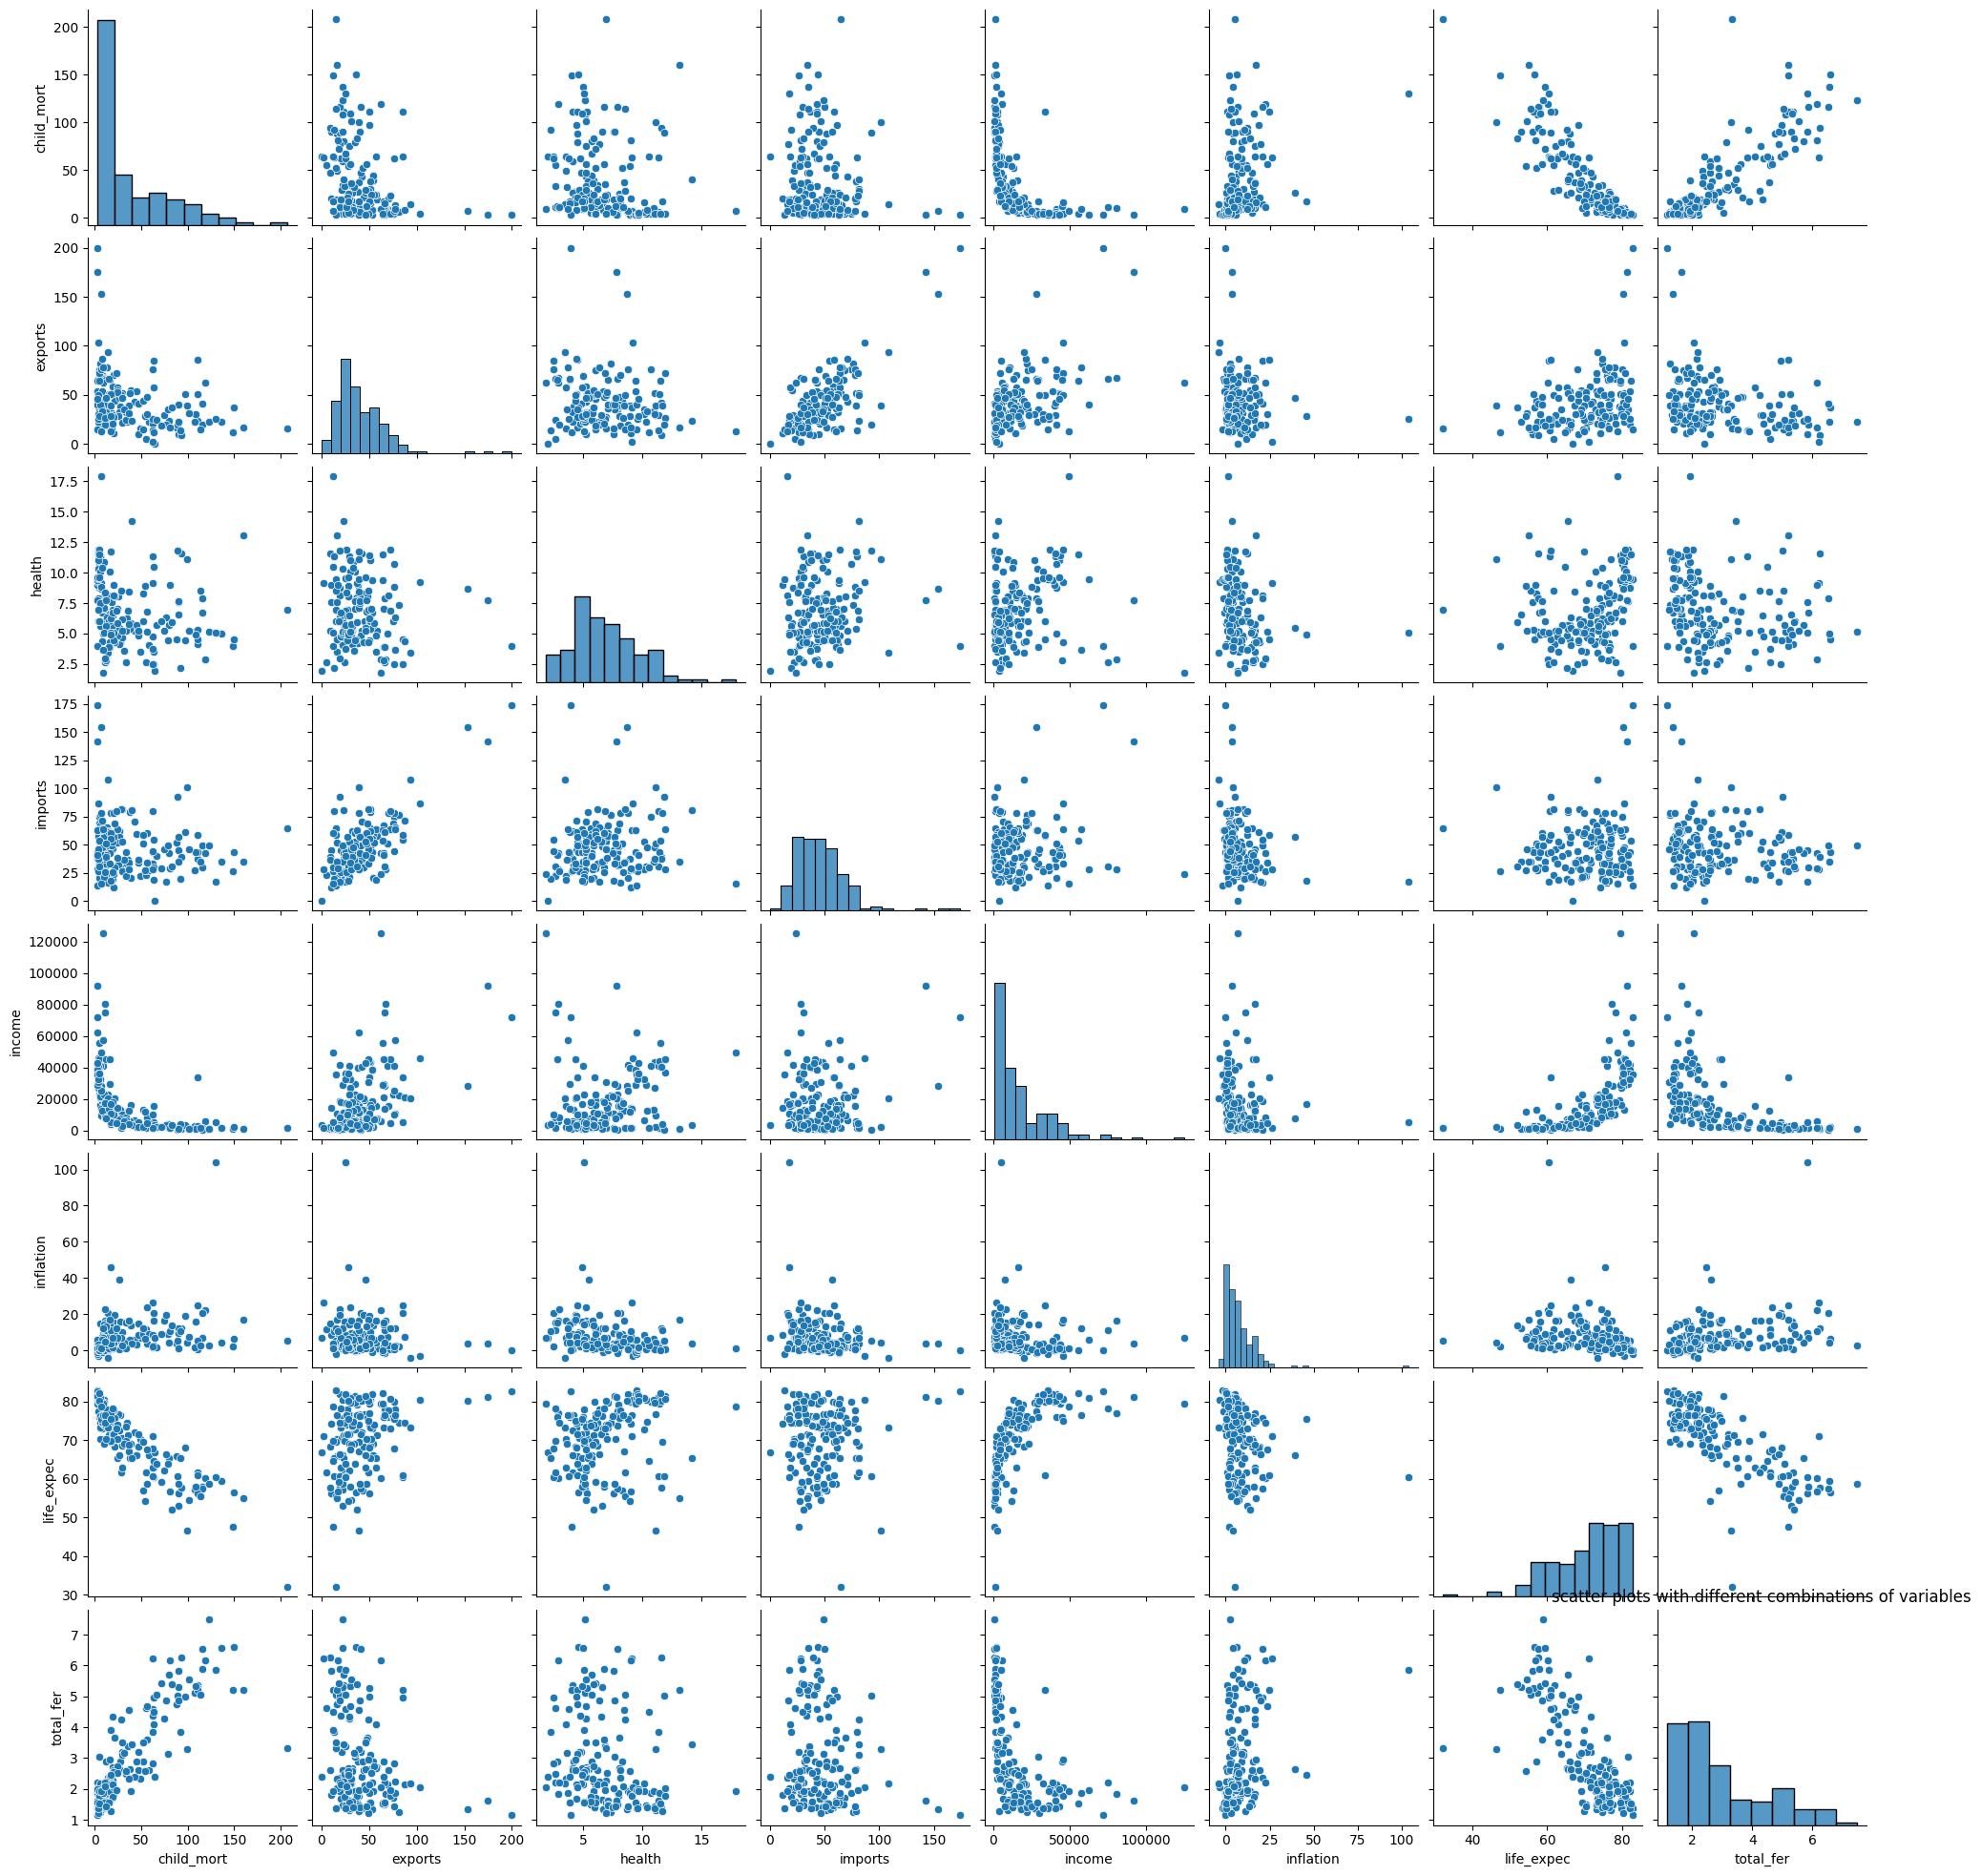

In [166]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(country_df.drop('gdpp', axis=1))
plt.title("scatter plots with different combinations of variables")

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [167]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

M_scaled = MinMaxScaler()

df_scaled_array = M_scaled.fit_transform(country_df)
df_scaled = pd.DataFrame(df_scaled_array, columns=country_df.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

Clustering models aim to group data into distinct “clusters” or groups. The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 

### Selecting K

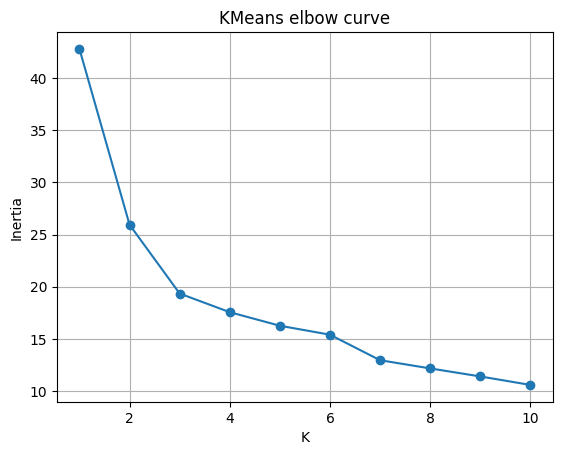

In [168]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.grid(visible=True)
    plt.title("KMeans elbow curve")
    plt.show()


# Plot elbow curve using scaled dataset

elbow_Kmeans(df_scaled)

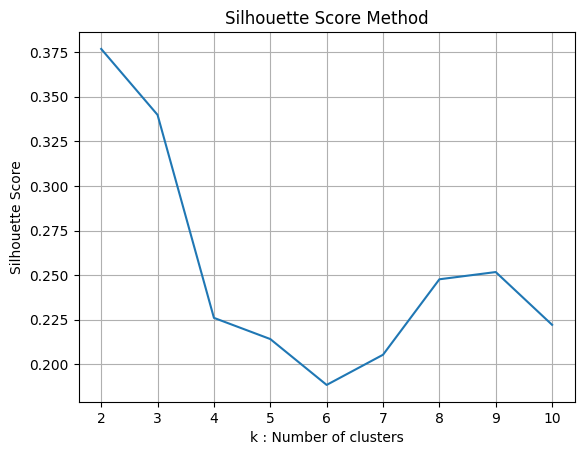

In [169]:
# Silhouette score method

kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1): #creating a loop to iterate through range 2-10
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

Based on the elbow method and silhouette analysis, we can choose the optimal number of clusters (k) for the country dataset. In this case, k=3 seems to be a reasonable choice.

## Fitting a K-Means Model with the selected K value

In [170]:
# Remember to set the random_state to rseed

In [171]:
optimal_clusters = 3 # (k)

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=rseed)
kmeans.fit(df_scaled)
df_scaled['Cluster'] = kmeans.labels_

In [172]:
# Count the number of records in each cluster
df_scaled['Cluster'].value_counts()

Cluster
0    87
2    45
1    35
Name: count, dtype: int64

In [173]:
# Add the predicted cluster label column to the original dataframe
# Give each cluster a name
cluster_names = {
    0: 'developing',
    1: 'developed',
    2: 'least developed'
}

# Map the cluster names to the 'Cluster' column
df_scaled['Cluster'] = df_scaled['Cluster'].map(cluster_names)

In [174]:
# Cluster characteristics
df_scaled.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
developed,0.011184,0.291771,0.441730,0.295760,0.363321,0.062333,0.949620,0.093240,0.409340
developing,0.096839,0.201990,0.275476,0.271713,0.096755,0.109138,0.796005,0.183854,0.061339
least developed,0.448556,0.143746,0.278392,0.243711,0.023687,0.151784,0.537322,0.624465,0.014068


## Visualisation of clusters

In [175]:
# Check model performance with the silhouette coefficient

def scatter_Kmeans(x, k, x_name, y_name, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)
    
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

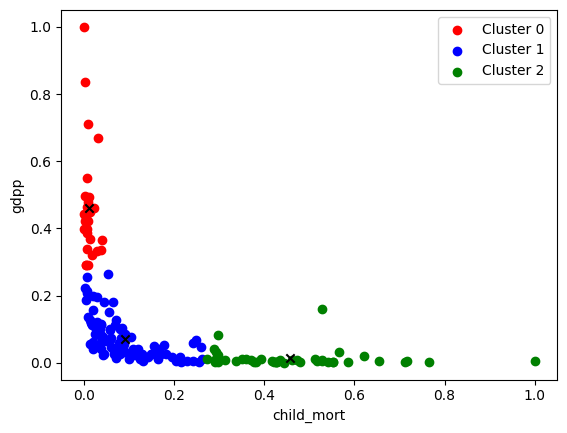

In [176]:
# Visualisation of clusters: child mortality vs gdpp
x=df_scaled[["child_mort","gdpp"]].values

scatter_Kmeans(x, 3, "child_mort","gdpp", r=0)

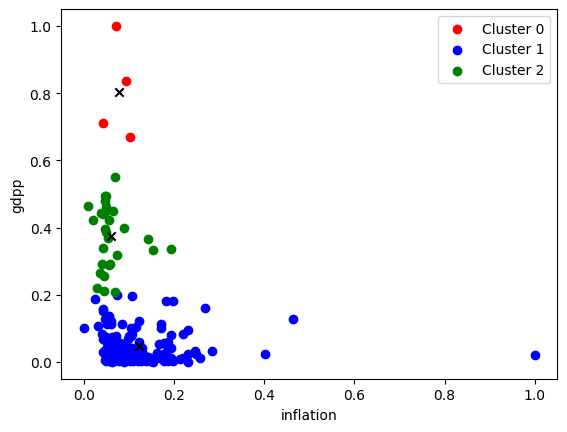

In [177]:
# Visualisation of clusters: inflation vs gdpp

x_inflat=df_scaled[["inflation","gdpp"]].values
scatter_Kmeans(x_inflat, 3, "inflation","gdpp",r=0)


## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**
Based on the count values for each cluster, the following labels: least developed, developing and developed have been assigned to each cluster. In the developed cluster it shows that child mortality, inflation and gdpp are lower than the other two sets of clusters which is expected in a developed country.
The other countries shows a decline in these areas as expected with least developed countries being the lowest.

Appendix

Reference: https://www.datacamp.com/tutorial/k-means-clustering-python